![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/01_Machine%20Learning%20%26%20Linear%20Regression/01_ml-linear-regression_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- The following list shows the names of tables we can work with:

In [2]:
import seaborn as sns #!
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

- We might see the all the tables and its data in [this GitHub repo](https://github.com/mwaskom/seaborn-data).
- Substitue the `name` by the dataset you want:

In [4]:
df_tips = sns.load_dataset('tips') #!

In [5]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## `LinearRegression()` Model in Python

### Fit the Model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model_lr = LinearRegression()

In [8]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [34]:
target = df_tips['tip']
explanatory = df_tips[['total_bill']]

In [35]:
model_lr.fit(X=explanatory, y=target)

LinearRegression()

### Calculate Predictions

In [36]:
model_lr.predict(X=explanatory)

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

### Create a New Column for the Predictions

In [37]:
df_pred = df_tips[['total_bill', 'tip']].copy()

In [38]:
df_pred['pred_lr'] = model_lr.predict(X=explanatory)

In [39]:
df_pred

,total_bill,tip,pred_lr
0,16.99,1.01,2.704636
1,10.34,1.66,2.006223
...,...,...,...
242,17.82,1.75,2.791807
243,18.78,3.00,2.892630


### Visualize the Model

1. The `x-axis` is represented by the **explanatory variable** you used to fit the model.
2. The `y-axis` is represented by the **predictions** you computed before.

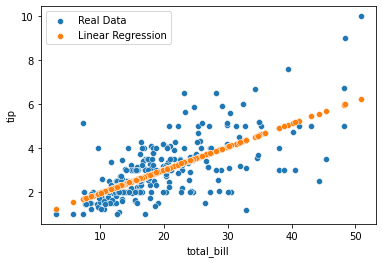

In [40]:
sns.scatterplot(x='total_bill', y='tip', data=df_pred, label='Real Data')
sns.scatterplot(x='total_bill', y='pred_lr', data=df_pred, label='Linear Regression');

### Model Interpretation

1. Especify the **mathematical equation** of the model.
2. **Interpret the coefficients** from the equation.

In [41]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['total_bill'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.10502452]),
 '_residues': 252.78874385077603,
 'rank_': 1,
 'singular_': array([138.77486834]),
 'intercept_': 0.9202696135546731}

$$
tip = (a) + (b) \cdot total\_bill \\
tip = (0.920) + (0.105) \cdot total\_bill
$$

For **each 1 unit increase** in `total_bill`, the `tip` **will increase 0.92 units**.

### Model's Score

In [42]:
model_lr.score(X=explanatory, y=target)

0.45661658635167657

## `KNeighborsRegressor()` in Python

### Fit the Model

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
model_kn = KNeighborsRegressor()

In [45]:
model_kn.fit(X=explanatory, y=target)

KNeighborsRegressor()

### Calculate Predictions

In [47]:
df_pred['pred_kn'] = model_kn.predict(X=explanatory)

In [48]:
df_pred

,total_bill,tip,pred_lr,pred_kn
0,16.99,1.01,2.704636,2.916
1,10.34,1.66,2.006223,1.986
...,...,...,...,...
242,17.82,1.75,2.791807,2.688
243,18.78,3.00,2.892630,2.434


### Model's Score

In [49]:
model_kn.score(X=explanatory, y=target)

0.5603363923139638

## `GradientBoostingRegressor()` in Python

### Fit the Model

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
model_gb = GradientBoostingRegressor()

In [52]:
model_gb.fit(X=explanatory, y=target)

GradientBoostingRegressor()

### Calculate Predictions

In [55]:
df_pred['pred_gb'] = model_gb.predict(X=explanatory)

In [56]:
df_pred

,total_bill,tip,pred_lr,pred_kn,pred_gb
0,16.99,1.01,2.704636,2.916,2.740342
1,10.34,1.66,2.006223,1.986,1.875271
...,...,...,...,...,...
242,17.82,1.75,2.791807,2.688,2.504886
243,18.78,3.00,2.892630,2.434,2.968450


### Model's Score

In [57]:
model_gb.score(X=explanatory, y=target)

0.7973753341134747

## Visualize the 3 Models

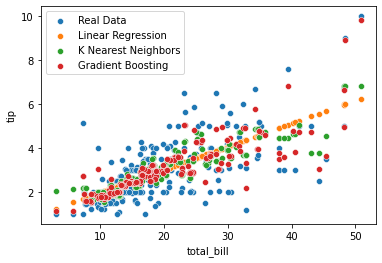

In [64]:
sns.scatterplot(x='total_bill', y='tip', data=df_pred, label='Real Data')
sns.scatterplot(x='total_bill', y='pred_lr', data=df_pred, label='Linear Regression')
sns.scatterplot(x='total_bill', y='pred_kn', data=df_pred, label='K Nearest Neighbors')
sns.scatterplot(x='total_bill', y='pred_gb', data=df_pred, label='Gradient Boosting');

## Which One Is the Best? Why?

In [58]:
model_lr.score(X=explanatory, y=target)

0.45661658635167657

In [60]:
model_kn.score(X=explanatory, y=target)

0.5603363923139638

In [61]:
model_gb.score(X=explanatory, y=target)

0.7973753341134747

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.